# 华泰价值选股研报复现和延伸研究

<font color='red'>**比乔斯基选股模型**</font>是斯坦福大学商学院教授约瑟夫·比乔斯基的基于市净率、以历史财务数据为衡量标准的价值选股模型。该选股模型在低市净率选股的基础上，通过代表盈利水平、财务杠杆及流动性和运营效率的9个财务指标对股票进行优劣筛选。

底层逻辑:比乔斯基认为购买低市净率的上市公司股票即股价和每 股净资产比值相对低的股票是具有安全边际的。但美股中低市净率股票的上市公司更容易陷入财务困境直至破产和退市，于是考虑通过上市公司财务报表分析方法来避免低市净率的投资陷阱。其经典论文《Value Investing: The Use of Historical Financial Statement Information to Separate Winners from Losers》就提出并验证了 FScore 财务分析方法在美国股票市场可以显著提高低市净率股票组合收益率。

从逻辑上看，低市净率是一个有效的选股因子。华泰研报对市净率的分层结果可以看出，在剔除负市净率之后，低市净率组在收益表现上好于高市净率组。比乔斯基策略在低市净率的基础上加入了关键财务指标作为选股条件后，模型表现较低市净率策略有着显著提高，并在其论文中证明了
财务指标分析方法是稳健可靠的。

但华泰对根据比乔斯基的 FScore 选股方法在 A 股市场进行了实证研究发现，FScore 模型的增强效果在 A 股市场并没有那么显著，并提出了改进。这里不对实证内容复刻，分析逻辑详见研报。这里对华泰的 FFScore 模型进行复刻，尝试建立一个基准优化体系，再尝试在此基础上，做下一步优化思考。


## 低市净率比乔斯基选股量化标准

比乔斯基在其模型中选用了代表盈利水平、财务杠杆及流动性和运营效率的 9 个财务指标对股票进行优劣筛选。首先将这三个领域共九个指标采用 0-1 度量（即参数为 1 或者 0），使得股票的得分为 0 至 9 分。分数越高时，代表该股票的投资价值越高。比乔斯基低市净率FScore的9指标模型股票池为市净率为正值且位于全市场的前20%(PB因子升序排序分五组的第一组)；比乔斯基9指标模型选股标准如下： 

**盈利水平**

代表了盈利水平的指标为资产收益率(ROA)、经营现金流量(CFO)、资产收益率变化($\Delta ROA$)、与自然增长性(ACCRUAL)。一家企业的收益率与现金流指标展现了一家企业累积资本的能力。比乔斯基也提到低市净率的上市公司有历史收益不佳的问题，如果在最新财报期能够看到盈利能力并呈现现金净流入，即收益增长趋势，则可以说明这家公司开始 具备改善未来盈利水平的能力。此外，自然增长性表现了收益与现金流的关系。如果现金的流入能够超越收益，则说明了企业在未来的增长有更好的基础。

1. 资产收益率($ROA$：净利润\*2/(期初总资产+期末总资产),原本使用的EBIT \* 2/(期初总资产+期末总资产))为正则为1否则为0； 
2. 经营现金流量($CFO$：经营活动产生的现金流量净额除以资产总值)为正则为1否则为0； 
3. 资产收益率同比($\Delta ROA$)增加为正则为1否则为0；
4. 收益自然增长率($ACCRUAL$:CFO减去ROA的差值)为正则为1否则为0；

**财务杠杆和流动性**

代表了财务杠杆及流动性的指标为杠杆变化($\Delta LEVER$)、流动性变化($\Delta LIQUID$)）、与是否发行普通股权(EQ_OFFER)。正如我们分析得出的结论，低市净率的公司往往面临 着财务困境，所以通常会有着杠杆偏高，流动性偏弱，以及需要通过增资扩股来进行外部 融资的需求。我们可以将杠杆的减少、流动性的增强，以及没有扩充股权的需求来作为一家企业在财务困境方面是否有好转的信号

5. 长期资产负债率同比($\Delta LEVER$)减少,为负时为1否则为0；
6. 流动比率同比($\Delta LIQUID$)增加正则为1否则为0；
7. 股本等于或者小于同比的股本($EQ_OFFER$)正则为1否则为0；

**运营效率**

代表了运营效率的指标为毛利润率变化($\Delta MARGIN$)与资产周转率变化($\Delta TURN$)。毛利润的增加意味着公司的成本降低或者产品售价提高。资产周转率增加则反映了公司运营 周转效率的提升。因此，这两个指标有效的表示了企业在运营方面的能力提高，从而为其未来生存竞争力与公司的成长提供有力的支持。

8. 毛利率同比增加($\Delta MARGIN$)正则为1否则为0；
9. 资产周转率同比增加($\Delta TURN$)正则为1否则为0

FScore为以上九个参数之和，反应企业整体投资价值的信号:
$$FScore = ROA + CFO + \Delta ROA + ACCRUAL + \Delta LEVER + \Delta LIQUID + EQ_OFFER + \Delta MARGIN + \Delta TURN $$

## 通过华泰的研报分析优化后的FFScore

由于 A 股市场相对于美国市场的波动更高、以及 9 个财务指标来进行筛选高分股票数量偏少导致的投资收益的风险增大的原因，同时可能还由于财务报告编制方法、中美财务指标的计算原则、以及 A 股市场投资者对财务指标变化的理解有所不同，华泰尝试进一步优化原有的比乔斯基低市净率 5 指标 FScore 选股策略，并提出了更适合中国 A 股市场的华泰 Five FScore（FFScore）低市净率选股模型。（这里务必注意，所有的数据为同比变化，故调仓周期不可小于季度）

**盈利水平**

在体现盈利水平方面上，选取了 ROE 指标（ROE=归属母公司股东净利润／年平均归属母公司股东的权益），即衡量每份股东权益所产生的盈利，而非每份资产所产生
的盈利。这样能够更好的诠释公司为股东创造的价值，通过盈利能力驱动股价上涨。

1. 资产收益率（ROE）：<font color='red'>收益率</font>为正数时ROE=1，否则为0。
2. 资产收益率变化（△ROA）：当期最新可得财务报告的<font color='red'>ROA同比</font>的变化。变化为正数时△ROA=1，否则为0。


**财务杠杆和流动性**

比乔斯基 5 指标模型中选取了△LEVER 一个指标代表了盈利水平。是因为△LEVER 指标是由长期负债与长期资产两部分构成，能够相对较好的减轻短期市场波动带来的影响，从更大程度上反应一家上市企业自己经营与发展方面的财务情况。这一点尤其在波动较大的A 股市场适用

3. 杠杆变化（△LEVER）：杠杆通过非流动负债合计除以非流动资产合计计算，杠杆变化为当期最新可得财务报告的<font color='red'>杠杆同比</font>的变化。变化为负数时△LEVER=1，否则为0。

**运营效率**

从财务分析的角度考虑，销售毛利率增量（△MARGIN）中毛利润除以营业收入的构成，这与△ROE 指标的选取要素净利润类似，均含有利润相关的指标。一定程度上和盈利水平指标重复。在 5 指标模型中已经分析得到△MARGIN 与△ROA 指标的相关度达到了0.64892。因此即使在使用单个指标时效果优异，组合后的效果并不明显。类似的，我们选取净利率（△NETMARGIN）后发现，组合的效果并不理想。因此我们选择加入了流动资产周转率变化（△CATURN）指标，通过主营业务收入与流动资产的比例来反映流动资产的周转速度，来衡量企业在生产运营上对流动资产的利用效率。

△CATURN 与△TURN 能更好的单独筛选出运营效率好的上市公司，避免了盈利水平指标的影响，所以我们选取流动资产周转率变化（△CATURN）与资产周转率变化（△TURN）代表运营效率。

4. 流动资产周转率变化（△CATURN）： 流动资产周转率变化为当期最新可得财务报告的<font color='red'>资产周转率同比</font>的变化。变化为正数时△CATURN =1，否则为0。
5. 资产周转率变化（△TURN）： 资产周转率通过总资产周转率除以平均资产总值计算，资产周转率变化为当期最新可得财务报告的<font color='red'>资产周转率同比</font>的变化。变化为正数时△TURN =1，否则为0。

FFScore为以上五个参数之和，反应企业整体投资价值的信号:
$$FFScore = ROE + \Delta ROE + \Delta CATURN + \Delta TURN + \Delta LEVER$$

## 导入依赖库，部分方法

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import empyrical as ep

import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

from tqdm import trange, tqdm_notebook
import seaborn as sns
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 因子分析库
import alphalens.tears as tears
import alphalens.utils as utils
import alphalens.plotting as plotting
import alphalens.performance as perf

from alphalens.tears import create_turnover_tear_sheet  # 需要重写的方法

path = '/home/bigquant/work/src/因子/金工研报复现/基本面因子/'

def pd_option():
    pd_display_rows = 20
    pd_display_cols = 200
    pd_display_width = 1024
    pd.set_option('display.max_rows', pd_display_rows)
    pd.set_option('display.min_rows', pd_display_rows)
    pd.set_option('display.max_columns', pd_display_cols)
    pd.set_option('display.width', pd_display_width)
    pd.set_option('display.max_colwidth', pd_display_width)
    pd.set_option('display.unicode.ambiguous_as_wide', True)
    pd.set_option('display.unicode.east_asian_width', True)
    pd.set_option('expand_frame_repr', False)
    
pd_option()

class GridFigure(object):
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.fig = plt.figure(figsize=(14, rows * 7))
        self.gs = gridspec.GridSpec(rows, cols, wspace=0.4, hspace=0.3)
        self.curr_row = 0
        self.curr_col = 0

    def next_row(self):
        if self.curr_col != 0:
            self.curr_row += 1
            self.curr_col = 0
        subplt = plt.subplot(self.gs[self.curr_row, :])
        self.curr_row += 1
        return subplt

    def next_cell(self):
        if self.curr_col >= self.cols:
            self.curr_row += 1
            self.curr_col = 0
        subplt = plt.subplot(self.gs[self.curr_row, self.curr_col])
        self.curr_col += 1
        return subplt

    def close(self):
        plt.close(self.fig)
        self.fig = None
        self.gs = None
        
def create_turnover_tear_sheet(factor_data, turnover_periods=None):
    if turnover_periods is None:
        input_periods = utils.get_forward_returns_columns(
            factor_data.columns, require_exact_day_multiple=True,
        ).to_numpy()  # 这里为修改的bug，解决平台出错问题
        turnover_periods = utils.timedelta_strings_to_integers(input_periods)
    else:
        turnover_periods = utils.timedelta_strings_to_integers(
            turnover_periods,
        )

    quantile_factor = factor_data["factor_quantile"]

    quantile_turnover = {
        p: pd.concat(
            [
                perf.quantile_turnover(quantile_factor, q, p)
                for q in quantile_factor.sort_values().unique().tolist()
            ],
            axis=1,
        )
        for p in turnover_periods
    }

    autocorrelation = pd.concat(
        [
            perf.factor_rank_autocorrelation(factor_data, period)
            for period in turnover_periods
        ],
        axis=1,
    )

    plotting.plot_turnover_table(autocorrelation, quantile_turnover)  # 更改包名

    fr_cols = len(turnover_periods)
    columns_wide = 1
    rows_when_wide = ((fr_cols - 1) // 1) + 1
    vertical_sections = fr_cols + 3 * rows_when_wide + 2 * fr_cols
    gf = GridFigure(rows=vertical_sections, cols=columns_wide)

    for period in turnover_periods:
        if quantile_turnover[period].isnull().all().all():
            continue
        plotting.plot_top_bottom_quantile_turnover(
            quantile_turnover[period], period=period, ax=gf.next_row()
        )

    for period in autocorrelation:
        if autocorrelation[period].isnull().all():
            continue
        plotting.plot_factor_rank_auto_correlation(
            autocorrelation[period], period=period, ax=gf.next_row()
        )

    plt.show()
    gf.close()

## 因子数据提取
这里选择股票池为沪深300

In [38]:
# 本代码由可视化策略环境自动生成 2022年5月9日 08:57
# 本代码单元只能在可视化模式下编辑。您也可以拷贝代码，粘贴到新建的代码单元或者策略，然后修改。


# Python 代码入口函数，input_1/2/3 对应三个输入端，data_1/2/3 对应三个输出端
def m5_run_bigquant_run(input_1, input_2, input_3):
    '''
        input_1 数据输入
        input_2 空
        input_3 参数输入
    '''
    
    # 参数
    params = input_3.read_pickle()
    
    # 输入
    df = input_1.read_df()
    # 过滤
    df = df[(df.date>=params["start_date"]) & (df.date<=params["end_date"])]
    # 输出
    data_1 = DataSource.write_df(df)
    return Outputs(data_1=data_1, data_2=None, data_3=None)

# 后处理函数，可选。输入是主函数的输出，可以在这里对数据做处理，或者返回更友好的outputs数据格式。此函数输出不会被缓存。
def m5_post_run_bigquant_run(outputs):
    return outputs


m1 = M.input_features.v1(
    features="""market_cap_0
fs_roe_ttm_0
fs_current_assets_0
fs_non_current_assets_0
fs_fixed_assets_0
fs_non_current_liabilities_0
fs_operating_revenue_ttm_0
pb_lf_0
open_0
close_0"""
)

m2 = M.instruments.v2(
    start_date='2014-01-01',
    end_date='2022-05-01',
    market='CN_STOCK_A',
    instrument_list='',
    max_count=0
)

m3 = M.general_feature_extractor.v6(
    instruments=m2.data,
    features=m1.data,
    start_date='',
    end_date='',
    before_start_days=120
)

m4 = M.derived_feature_extractor.v2(
    input_data=m3.data,
    features=m1.data,
    date_col='date',
    instrument_col='instrument'
)

m9 = M.chinaa_stock_filter.v1(
    input_data=m4.data,
    index_constituent_cond=['全部'],
    board_cond=['全部'],
    industry_cond=['全部'],
    st_cond=['正常'],
    delist_cond=['非退市'],
    output_left_data=False
)

m10 = M.fillnan.v1(
    input_data=m9.data,
    features=m1.data,
    fill_value='median'
)

m5 = M.cached.v3(
    input_1=m4.data,
    input_3=m2.data,
    run=m5_run_bigquant_run,
    post_run=m5_post_run_bigquant_run,
    input_ports='',
    params='{}',
    output_ports=''
)

m6 = M.advanced_auto_labeler.v2(
    instruments=m2.data,
    label_expr="""# #号开始的表示注释
# 0. 每行一个，顺序执行，从第二个开始，可以使用label字段
# 1. 可用数据字段见 https://bigquant.com/docs/data_history_data.html
#   添加benchmark_前缀，可使用对应的benchmark数据
# 2. 可用操作符和函数见 `表达式引擎 <https://bigquant.com/docs/big_expr.html>`_

# 计算收益：5日收盘价(作为卖出价格)除以明日开盘价(作为买入价格)
shift(close, -5) / shift(open, -1)

# 极值处理：用1%和99%分位的值做clip
# clip(label, all_quantile(label, 0.01), all_quantile(label, 0.99))

# 将分数映射到分类，这里使用20个分类
all_wbins(label, 20)

# 过滤掉一字涨停的情况 (设置label为NaN，在后续处理和训练中会忽略NaN的label)
where(shift(high, -1) == shift(low, -1), NaN, label)
""",
    start_date='',
    end_date='',
    benchmark='000300.SHA',
    drop_na_label=True,
    cast_label_int=True
)

m7 = M.join.v3(
    data1=m6.data,
    data2=m5.data_1,
    on='date,instrument',
    how='inner',
    sort=True
)


[2022-05-08 15:13:20.998460] INFO: moduleinvoker: input_features.v1 开始运行..

[2022-05-08 15:13:21.186596] INFO: moduleinvoker: 命中缓存

[2022-05-08 15:13:21.188921] INFO: moduleinvoker: input_features.v1 运行完成[0.19049s].

[2022-05-08 15:13:21.195317] INFO: moduleinvoker: instruments.v2 开始运行..

[2022-05-08 15:13:21.291720] INFO: moduleinvoker: instruments.v2 运行完成[0.096396s].

[2022-05-08 15:13:21.315846] INFO: moduleinvoker: general_feature_extractor.v6 开始运行..

[2022-05-08 15:13:26.848961] INFO: 基础特征抽取: 年份 2013, 特征行数=199823

[2022-05-08 15:13:30.708568] INFO: 基础特征抽取: 年份 2014, 特征行数=569948

[2022-05-08 15:13:34.348740] INFO: 基础特征抽取: 年份 2015, 特征行数=569698

[2022-05-08 15:13:39.522437] INFO: 基础特征抽取: 年份 2016, 特征行数=641546

[2022-05-08 15:13:44.859137] INFO: 基础特征抽取: 年份 2017, 特征行数=743233

[2022-05-08 15:13:51.474316] INFO: 基础特征抽取: 年份 2018, 特征行数=816987

[2022-05-08 15:13:57.860563] INFO: 基础特征抽取: 年份 2019, 特征行数=884867

[2022-05-08 15:14:04.808817] INFO: 基础特征抽取: 年份 2020, 特征行数=945961

[2022-05-08 15:14:15.359973] INFO: 基础特征抽取: 年份 2021, 特征行数=1061527

[2022-05-08 15:14:18.374249] INFO: 基础特征抽取: 年份 2022, 特征行数=363977

[2022-05-08 15:14:18.545903] INFO: 基础特征抽取: 总行数: 6797567

[2022-05-08 15:14:18.563877] INFO: moduleinvoker: general_feature_extractor.v6 运行完成[57.248043s].

[2022-05-08 15:14:18.574924] INFO: moduleinvoker: derived_feature_extractor.v2 开始运行..

[2022-05-08 15:14:33.963424] INFO: derived_feature_extractor: /y_2013, 199823

[2022-05-08 15:14:35.195017] INFO: derived_feature_extractor: /y_2014, 569948

[2022-05-08 15:14:36.587431] INFO: derived_feature_extractor: /y_2015, 569698

[2022-05-08 15:14:39.623883] INFO: derived_feature_extractor: /y_2016, 641546

[2022-05-08 15:14:41.222853] INFO: derived_feature_extractor: /y_2017, 743233

[2022-05-08 15:14:42.951088] INFO: derived_feature_extractor: /y_2018, 816987

[2022-05-08 15:14:45.028442] INFO: derived_feature_extractor: /y_2019, 884867

[2022-05-08 15:14:47.425794] INFO: derived_feature_extractor: /y_2020, 945961

[2022-05-08 15:14:49.747563] INFO: derived_feature_extractor: /y_2021, 1061527

[2022-05-08 15:14:51.066888] INFO: derived_feature_extractor: /y_2022, 363977

[2022-05-08 15:14:51.452393] INFO: moduleinvoker: derived_feature_extractor.v2 运行完成[32.877454s].

[2022-05-08 15:14:51.463596] INFO: moduleinvoker: chinaa_stock_filter.v1 开始运行..

[2022-05-08 15:14:52.358582] INFO: A股股票过滤: 过滤 /y_2013, 193799/0/199823

[2022-05-08 15:14:54.273943] INFO: A股股票过滤: 过滤 /y_2014, 554064/0/569948

[2022-05-08 15:14:56.141340] INFO: A股股票过滤: 过滤 /y_2015, 556950/0/569698

[2022-05-08 15:14:58.285096] INFO: A股股票过滤: 过滤 /y_2016, 630391/0/641546

[2022-05-08 15:15:00.550611] INFO: A股股票过滤: 过滤 /y_2017, 730683/0/743233

[2022-05-08 15:15:03.218977] INFO: A股股票过滤: 过滤 /y_2018, 800233/0/816987

[2022-05-08 15:15:06.072638] INFO: A股股票过滤: 过滤 /y_2019, 857033/0/884867

[2022-05-08 15:15:09.500865] INFO: A股股票过滤: 过滤 /y_2020, 903088/0/945961

[2022-05-08 15:15:12.819562] INFO: A股股票过滤: 过滤 /y_2021, 1015542/0/1061527

[2022-05-08 15:15:14.220106] INFO: A股股票过滤: 过滤 /y_2022, 350449/0/363977

[2022-05-08 15:15:14.227486] INFO: A股股票过滤: 过滤完成, 6592232 + 0

[2022-05-08 15:15:14.255279] INFO: moduleinvoker: chinaa_stock_filter.v1 运行完成[22.791671s].

[2022-05-08 15:15:14.266392] INFO: moduleinvoker: fillnan.v1 开始运行..

[2022-05-08 15:15:21.096876] INFO: moduleinvoker: fillnan.v1 运行完成[6.830471s].

## 待分析数据准备

In [39]:
# 检查宽邦的因子提取数据
data = m10.data.read_df()
data.to_csv(f'{path}/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6592232 entries, 0 to 6797566
Data columns (total 12 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   close_0                       float32       
 1   date                          datetime64[ns]
 2   fs_current_assets_0           float64       
 3   fs_fixed_assets_0             float64       
 4   fs_non_current_assets_0       float64       
 5   fs_non_current_liabilities_0  float64       
 6   fs_operating_revenue_ttm_0    float64       
 7   fs_roe_ttm_0                  float32       
 8   instrument                    object        
 9   market_cap_0                  float64       
 10  open_0                        float32       
 11  pb_lf_0                       float32       
dtypes: datetime64[ns](1), float32(4), float64(6), object(1)
memory usage: 553.2+ MB


In [40]:
# 计算因子并存储

# def cal_delta_m(df, factor=None, rename=None, period=0):
#     """
#     为按月计算同比或环比的数据差异，这里做按月计算均值，并平移数据获得同比或环比的数据值
#     """
#     df_tmp = df[['instrument', 'date_m', factor]].copy()
#     df = df.merge(df_tmp.groupby(by=['instrument', 'date_m']).mean().shift(period).reset_index().dropna().rename(columns={factor: rename}), on=['instrument', 'date_m'], how='left')
#     return df[['date', rename]]

ts_code = list(set(data['instrument'].tolist()))
# ---------------- 测试集 ---------------- #
# ts_code = ts_code[:2]  
# print(ts_code)
# --------------------------------------- #
df = pd.DataFrame()

for i in range(len(ts_code)):
    # 基本因子准备和计算逻辑
    # fs_roe_ttm_0                         净资产收益率 (TTM)
    #
    # fs_current_assets_0                  流动资产
    # CATURN                                      流动资产周转率 = 主营业务收入 / 流动资产
    # TURN                                        资产周转率 = 总资产周转率 / 平均资产总值
    # fs_non_current_assets_0              非流动资产
    # fs_fixed_assets_0                    固定资产
    # fs_total_assets_0                           总资产 = 流动资产 + 非流动资产 + 固定资产
    #
    # fs_current_liabilities_0             流动负债
    # fs_non_current_liabilities_0         非流动负债
    # LEVER                                       杠杆率 = 非流动负债 / 非流动资产
    # fs_operating_revenue_ttm_0           营业收入 (TTM)
    
    df_tmp = data[data['instrument']==ts_code[i]].copy()
    df_tmp.drop(columns=['open_0', 'close_0'], axis=1, inplace=True)
    df_tmp.set_index('date', inplace=True)
    df_tmp = df_tmp.resample('M').mean()
    
    df_tmp['fs_roe_ttm_12'] = df_tmp['fs_roe_ttm_0'].shift(12)
    df_tmp['fs_non_current_liabilities_12'] = df_tmp['fs_non_current_liabilities_0'].shift(12)
    df_tmp['fs_non_current_assets_12'] = df_tmp['fs_non_current_assets_0'].shift(12)
    df_tmp['fs_operating_revenue_ttm_12'] = df_tmp['fs_operating_revenue_ttm_0'].shift(12)
    df_tmp['fs_current_assets_1'] = df_tmp['fs_current_assets_0'].shift(1)
    df_tmp['fs_current_assets_12'] = df_tmp['fs_current_assets_0'].shift(12)
    df_tmp['fs_current_assets_13'] = df_tmp['fs_current_assets_0'].shift(13)
    df_tmp['fs_total_assets_0'] = df_tmp.apply(lambda x: x['fs_current_assets_0']+x['fs_non_current_assets_0']+x['fs_fixed_assets_0'], axis=1)
    df_tmp['fs_total_assets_1'] = df_tmp['fs_total_assets_0'].shift(1)
    df_tmp['fs_total_assets_12'] = df_tmp['fs_total_assets_0'].shift(12)
    df_tmp['fs_total_assets_13'] = df_tmp['fs_total_assets_0'].shift(13)
#     print(df_tmp.head(20))   
#     df_tmp.to_csv(f'{path}/df_tmp.csv')

    df_tmp.dropna(inplace=True)    
    if not df_tmp.empty:
        # FFscore因子组合
        # 盈利水平
        df_tmp['roe'] = df_tmp.apply(lambda x: 1 if x['fs_roe_ttm_0']>0 else 0, axis=1)
        df_tmp['delta_roe'] = df_tmp.apply(lambda x: 1 if (x['fs_roe_ttm_12'] != 0) and (x['fs_roe_ttm_0']/x['fs_roe_ttm_12']-1>0) else 0, axis=1)
        # 杠杆变化
        df_tmp['lever_0'] = df_tmp.apply(lambda x: x['fs_non_current_liabilities_0']/x['fs_non_current_assets_0'] if x['fs_non_current_assets_0'] != 0 else 0, axis=1)
        df_tmp['lever_12'] = df_tmp.apply(lambda x: x['fs_non_current_liabilities_12']/x['fs_non_current_assets_12'] if x['fs_non_current_assets_12'] != 0 else 0, axis=1)
        df_tmp['delta_lever'] = df_tmp.apply(lambda x: 1 if (x['lever_12'] != 0) and (-(x['lever_0']/x['lever_12']-1)>0) else 0, axis=1)
        # 流动资产周转率，这里是求周转率的变化，所以要先求周转率
        df_tmp['caturn_0'] = df_tmp.apply(lambda x: x['fs_operating_revenue_ttm_0']/(x['fs_current_assets_0'] + x['fs_current_assets_1'])/2 if (x['fs_current_assets_0'] + x['fs_current_assets_1']) != 0 else 0, axis=1)
        df_tmp['caturn_12'] = df_tmp.apply(lambda x: x['fs_operating_revenue_ttm_12']/(x['fs_current_assets_12'] + x['fs_current_assets_13'])/2 if (x['fs_current_assets_12'] + x['fs_current_assets_13']) != 0 else 0, axis=1)
        # 流动资产周转率同比
        df_tmp['delta_caturn'] = df_tmp.apply(lambda x: 1 if (x['caturn_12'] != 0) and(x['caturn_0']/x['caturn_12']-1>0) else 0, axis=1)
        # 总资产周转率
        df_tmp['total_asset_turnover_rate_0'] = df_tmp.apply(lambda x: x['fs_operating_revenue_ttm_0']/(x['fs_total_assets_0'] + x['fs_total_assets_1'])/2 if (x['fs_total_assets_0'] + x['fs_total_assets_1']) != 0 else 0, axis=1)
        df_tmp['total_asset_turnover_rate_12'] = df_tmp.apply(lambda x: x['fs_operating_revenue_ttm_12']/(x['fs_total_assets_12'] + x['fs_total_assets_13'])/2 if (x['fs_total_assets_12'] + x['fs_total_assets_13']) != 0 else 0, axis=1)
        # 总资产周转率同比
        df_tmp['delta_turn'] = df_tmp.apply(lambda x: 1 if (x['total_asset_turnover_rate_12'] != 0) and (x['total_asset_turnover_rate_0']/x['total_asset_turnover_rate_12']-1>0) else 0, axis=1)
        # 合成总分
        df_tmp['ffscore'] = df_tmp.apply(lambda x: x['roe']+x['delta_roe']+x['delta_lever']+x['delta_caturn']+x['delta_turn'], axis=1)
#         df_tmp.drop(columns=['fs_roe_ttm_12','fs_non_current_liabilities_12','fs_non_current_assets_12','fs_operating_revenue_ttm_12','fs_current_assets_1','fs_current_assets_12','fs_current_assets_13','fs_total_assets_0','fs_total_assets_1','fs_total_assets_12','fs_total_assets_13'], axis=1, inplace=True)
        df_tmp = df_tmp[['ffscore']]
        
        df_tmp.reset_index(inplace=True)
        df_tmp['instrument'] = ts_code[i]
#         print(df_tmp.tail(10))

        if df.empty:
            df = df_tmp
        else:
            df = pd.concat([df, df_tmp], axis=0, join='outer', ignore_index=True)


# 储存
df.to_csv(f'{path}/df.csv')
df#.head()

,date,ffscore,instrument
0,2014-09-30,2.0,600998.SHA
1,2014-10-31,2.0,600998.SHA
2,2014-11-30,2.0,600998.SHA
3,2014-12-31,2.0,600998.SHA
4,2015-01-31,2.0,600998.SHA
5,2015-02-28,2.0,600998.SHA
6,2015-03-31,2.0,600998.SHA
7,2015-04-30,2.0,600998.SHA
8,2015-05-31,3.0,600998.SHA
9,2015-06-30,3.0,600998.SHA


In [3]:
# 将因子升维与原价格数据合并，并完成日度数据补全

df = pd.read_csv(f'{path}/df.csv')[['instrument', 'date', 'ffscore']]
df['date'] = pd.to_datetime(df['date'])

data = pd.read_csv(f'{path}/data.csv')
del data['Unnamed: 0']
data['date'] = pd.to_datetime(data['date'])

df = df.merge(data[['open_0','date','instrument','pb_lf_0']], on=['date', 'instrument'], how='right')
df.sort_values(by=['instrument', 'date'], inplace=True)
df_factor = pd.DataFrame()
groups = df.groupby(['instrument'])
for name, group in groups:
    group['ffscore'] = group['ffscore'].fillna(method='bfill')
    group['ffscore'] = group['ffscore'].fillna(method='ffill')
    if df.empty:
            df_factor = group
    else:
        df_factor = pd.concat([df_factor, group], axis=0, join='outer', ignore_index=True)

df_factor.to_csv(f'{path}/df_factor.csv')
df_factor

,instrument,date,ffscore,open_0,pb_lf_0
0,000001.SZA,2013-08-26,3.0,620.65466,0.976068
1,000001.SZA,2013-08-27,3.0,635.83527,0.974277
2,000001.SZA,2013-08-28,3.0,627.07720,0.951890
3,000001.SZA,2013-08-29,3.0,630.58044,0.952786
4,000001.SZA,2013-08-30,3.0,615.39984,0.950099
5,000001.SZA,2013-09-02,3.0,627.07720,0.962636
6,000001.SZA,2013-09-03,3.0,629.99660,1.002932
7,000001.SZA,2013-09-04,3.0,651.59980,0.992187
8,000001.SZA,2013-09-05,3.0,646.92883,0.987709
9,000001.SZA,2013-09-09,3.0,658.60626,1.086212


# 因子分析

In [6]:
# 导入数据
# df = pd.read_csv(path)[['instrument', 'date', 'ffscore']]
# df['date'] = pd.to_datetime(df['date'])
df_factor = pd.read_csv(f'{path}/df_factor.csv')
del df_factor['Unnamed: 0']
df_factor['date'] = pd.to_datetime(df_factor['date'])
ts_codes = list(set(df_factor['instrument'].tolist()))
df_factor = df_factor.groupby('date').apply(lambda x: x.sort_values('instrument').set_index("instrument"))

# 准备价格数据，一定是开盘价！
prices = df_factor["open_0"]
prices = prices.unstack()
prices.fillna(0, inplace=True)

# 准备因子数据
factor = df_factor["ffscore"]

# 准备行业分组数据，这里取申万一级，必须存为 Dict 格式
industry_data = DataSource("industry_CN_STOCK_A").read(ts_codes, df_factor['date'].min(), df_factor['date'].max(), ['industry_sw_level1'])

# 将申万代码替换成文字
industry_name = DataSource("basic_info_IndustrySw").read()
industry_name.rename(columns={'code': 'industry_sw_level1'}, inplace=True)
industry_name['industry_sw_level1'] = industry_name['industry_sw_level1'].astype('int')
industry_data = industry_data.merge(industry_name[['industry_sw_level1', 'name']], on='industry_sw_level1', how='left')
del industry_data['industry_sw_level1']
industry_data.rename(columns={'name': 'industry_sw_level1'}, inplace=True)

# 数据汇总
industry_data = industry_data.drop('date', axis=1).drop_duplicates()
ticker_sector = dict(zip(industry_data['instrument'], industry_data['industry_sw_level1']))

In [10]:
df_factor.info()#.describe()
# prices.head()
# factor.describe()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6592232 entries, (Timestamp('2013-08-26 00:00:00'), '000001.SZA') to (Timestamp('2022-04-29 00:00:00'), '873169.BJA')
Data columns (total 4 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   ffscore  float64       
 2   open_0   float64       
 3   pb_lf_0  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 226.5+ MB


## 4)因子清洗和收益对齐

In [7]:
# 格式化因子数据
# 将因子数据、价格数据以及行业分类按照索引对齐地格式化到一个数据表中，这个数据表的索引是包含日期和资产的多重索引
factor_data = utils.get_clean_factor_and_forward_returns(
                                                    factor, # 因子
                                                    prices, # 价格
                                                    groupby=ticker_sector, # 行业分组，默认 False，也就是默认不按照行业分组计算收益
                                                    binning_by_group=True, # 是否按行业分组，默认 False。取值是 True 的话，也就是计算的结果都将按照行业分组之后，再行业内部进行计算。如果取值是 False 的话，则是所有成分股进行计算。分组计算可以理解成是传统的行业中性的做法。
                                                    quantiles=None,  # 分组个数，整型（Int）或者是数值型的列表。分成四组可以设置成[0,0.05,0.5,0.95,1]
                                                    bins=5,  # 直方图个数，默认 None，从数据取值的范围进行划分。注意quantile 和 bins 只能设置其中一个，另一个必须是 None。
                                                    periods=(1,60),  # 因子调仓周期。它是一个不可变长度的列表——元组（tuple）格式的数值，如(1,5,10,)，而不可以是数值或列表 list。
                                                    filter_zscore=None, # 异常值阈值设定，默认 None。
                                                    groupby_labels=None,  # 行业分组标签，即把所有的行业贴上标签。比如说，（煤炭）中信对应数字 1，（钢铁）中信对应数字 2，以此类推。但中文运算会变慢
                                                    max_loss=0.09,  # 通过比较输入因子索引中的项数和输出数据帧索引中的项数，计算出允许因子数据丢弃的最大百分比（0.00到1.00），类似覆盖率指标。
                                                    zero_aware=False,  # 如果为True，则分别计算正负信号值的分位数
                                                    cumulative_returns=True  # 如果为 True，则收益列将为累积回报。如果想分析某个因素对单个远期日的预测能力，应将其设置为False
                                                    )

Dropped 5.2% entries from factor data: 5.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 9.0%, not exceeded: OK!


In [1]:
# 查看数据结构
factor_data.head()

NameError: name 'factor_data' is not defined

In [10]:
df_ret = pd.pivot_table(factor_data.reset_index(),index='date',columns='factor_quantile',values='1D')
df_ret = df_ret+1
df_ret = df_ret.cumprod(axis=0, skipna=True)
T.plot(df_ret, title='1D因子分组收益')

In [9]:
df_ret = pd.pivot_table(factor_data.reset_index(),index='date',columns='factor_quantile',values='60D')
df_ret = df_ret+1
df_ret = df_ret.cumprod(axis=0, skipna=True)
T.plot(df_ret, title='60D因子分组收益')

In [11]:
def Strategy_performance(return_df: pd.DataFrame,
                         periods='daily') -> pd.DataFrame:
    '''计算风险指标 默认为月度:月度调仓'''

    ser: pd.DataFrame = pd.DataFrame()
    ser['年化收益率'] = ep.annual_return(return_df, period=periods)
    ser['累计收益'] = ep.cum_returns(return_df).iloc[-1]
    ser['波动率'] = return_df.apply(
        lambda x: ep.annual_volatility(x, period=periods))
    ser['夏普'] = return_df.apply(ep.sharpe_ratio, period=periods)
    ser['最大回撤'] = return_df.apply(lambda x: ep.max_drawdown(x))
    
    if 'benchmark' in return_df.columns:

        select_col = [col for col in return_df.columns if col != 'benchmark']

        ser['IR'] = return_df[select_col].apply(
            lambda x: information_ratio(x, return_df['benchmark']))
        ser['Alpha'] = return_df[select_col].apply(
            lambda x: ep.alpha(x, return_df['benchmark'], period=periods))
        
        ser['超额收益'] = ser['年化收益率'] - ser.loc[
            'benchmark', '年化收益率']  #计算相对年化波动率
        
    return ser.T
Strategy_performance(pd.pivot_table(factor_data.reset_index(),index='date',columns='factor_quantile',values='60D'),'monthly')#.style.format('{:.2%}')

factor_quantile,1,2,3,4,5
年化收益率,-0.331531,-0.242717,-0.180578,-0.129633,-0.042192
累计收益,-1.000000,-1.000000,-1.000000,-1.000000,-0.999371
波动率,0.545334,0.529857,0.540799,0.548768,0.557030
夏普,-0.441487,-0.240868,-0.085857,0.031052,0.204432
最大回撤,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


## 5)因子分位数统计

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.0,3.0,0.881920,0.341842,1113159,17.807128
2,1.0,3.0,1.990897,0.104926,1517798,24.280110
3,0.0,5.0,2.987138,0.126438,1479821,23.672595
4,2.0,4.0,3.977913,0.155128,1404741,22.471545
5,2.0,5.0,4.951709,0.233356,735680,11.768622


Returns Analysis


,1D,60D
Ann. alpha,0.089,0.048
beta,0.004,0.014
Mean Period Wise Return Top Quantile (bps),4.917,2.464
Mean Period Wise Return Bottom Quantile (bps),-4.614,-2.461
Mean Period Wise Spread (bps),9.530,4.925


Information Analysis


,1D,60D
IC Mean,0.007,0.031
IC Std.,0.047,0.058
Risk-Adjusted IC,0.154,0.526
t-stat(IC),6.998,23.837
p-value(IC),0.000,0.000
IC Skew,-0.028,0.065
IC Kurtosis,-0.275,-0.322


Turnover Analysis


,1D,60D
Quantile 1 Mean Turnover,0.008,0.348
Quantile 2 Mean Turnover,0.010,0.400
Quantile 3 Mean Turnover,0.011,0.432
Quantile 4 Mean Turnover,0.010,0.401
Quantile 5 Mean Turnover,0.009,0.386


,1D,60D
Mean Factor Rank Autocorrelation,0.995,0.721


<Figure size 432x288 with 0 Axes>

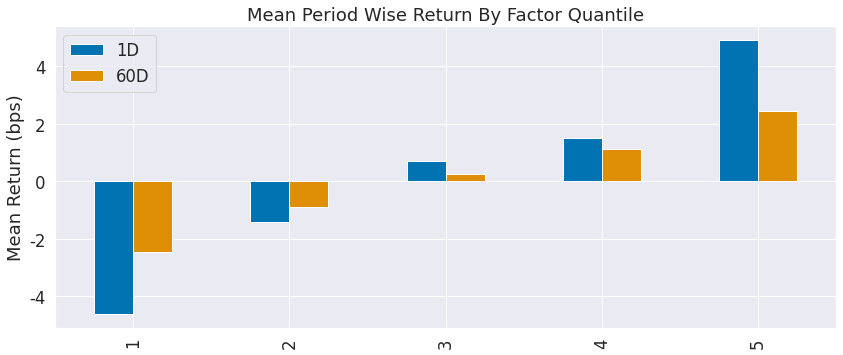

In [12]:
tears.create_summary_tear_sheet(factor_data)

## 6)因子收益分析

Returns Analysis


,1D
Ann. alpha,14.271
beta,0.004
Mean Period Wise Return Top Quantile (bps),143.484
Mean Period Wise Return Bottom Quantile (bps),-136.017
Mean Period Wise Spread (bps),279.500


<Figure size 432x288 with 0 Axes>

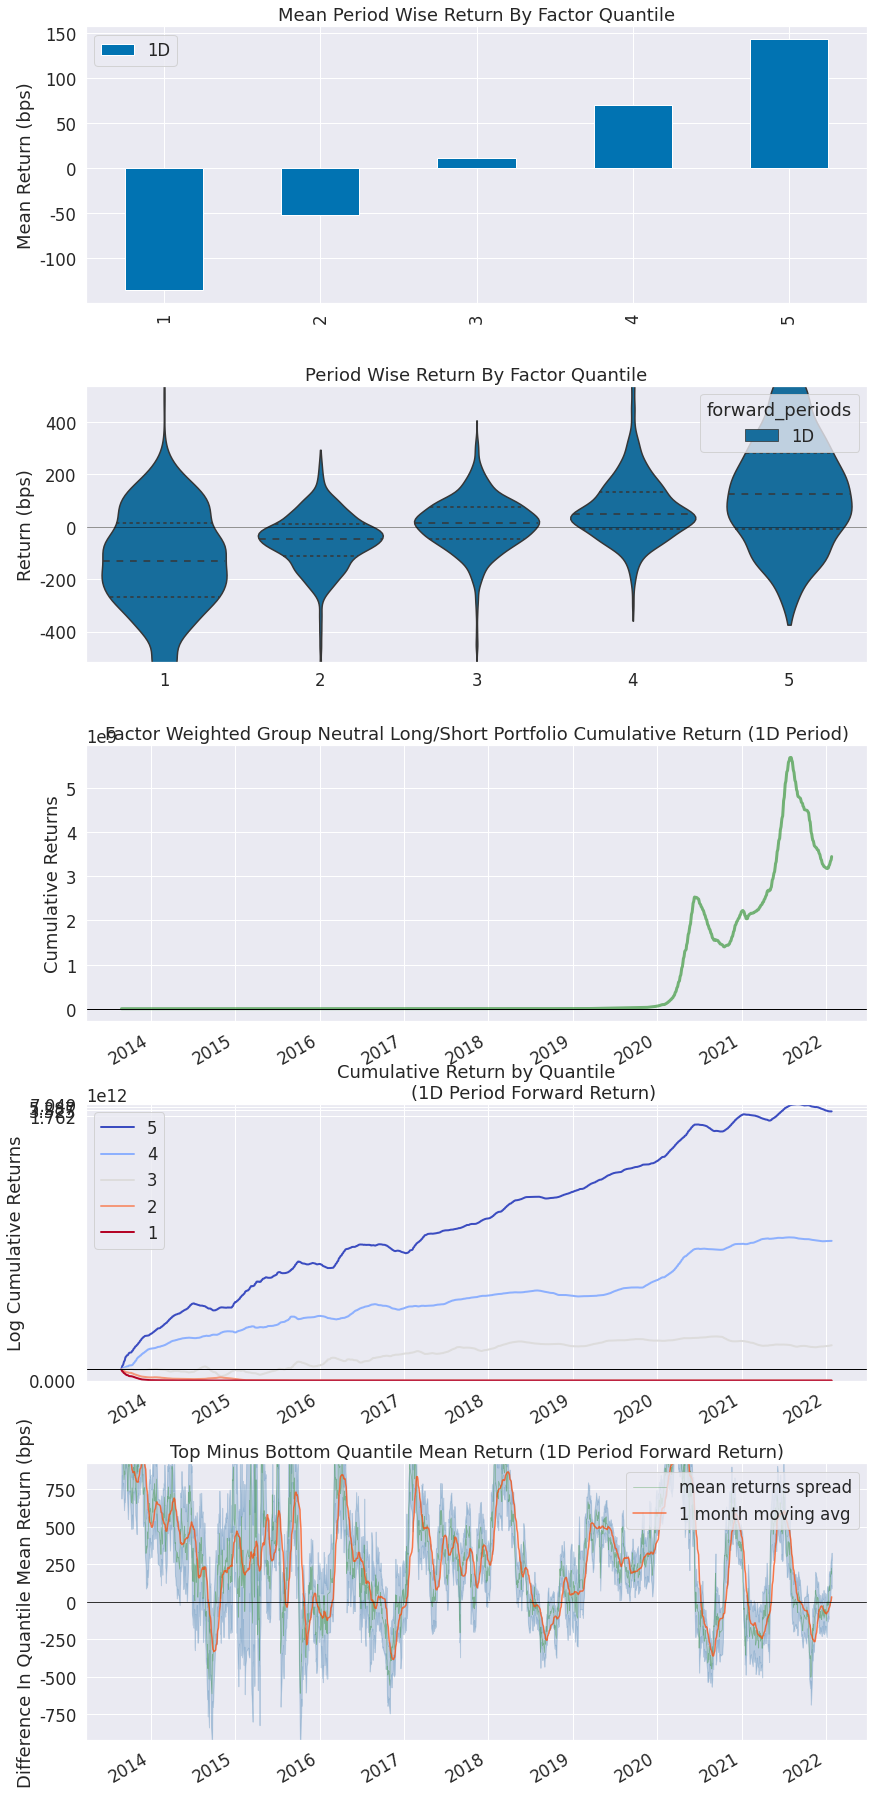

In [13]:
# 季度调仓的因子多空收益分析
df_tmp = factor_data.copy()
del df_tmp['1D']
df_tmp.rename(columns={'60D': '1D'}, inplace=True)
tears.create_returns_tear_sheet(df_tmp,
                                long_short=True,  # 是否计算多空组合的收益，如果 True，资产权重按平均值降低，使得分位数以 0 为轴，即超额收益，同时因为有做空机制，市场效应被中性化了，组合不再受市场的波动而影响。如果为 FALSE，则计算资产权重，将因子除以绝对值的和，实现为绝对收益，并且只显示多头的纯组合
                                group_neutral=True,  # 是否按照行业调整或者行业中性后的收益
                                by_group=False # 是否按照行业分组展示
                               )

## 7)因子IC分析

Information Analysis


,1D,60D
IC Mean,0.006,0.017
IC Std.,0.070,0.060
Risk-Adjusted IC,0.084,0.287
t-stat(IC),2.508,8.540
p-value(IC),0.012,0.000
IC Skew,-0.099,-0.060
IC Kurtosis,0.044,0.244


<Figure size 432x288 with 0 Axes>

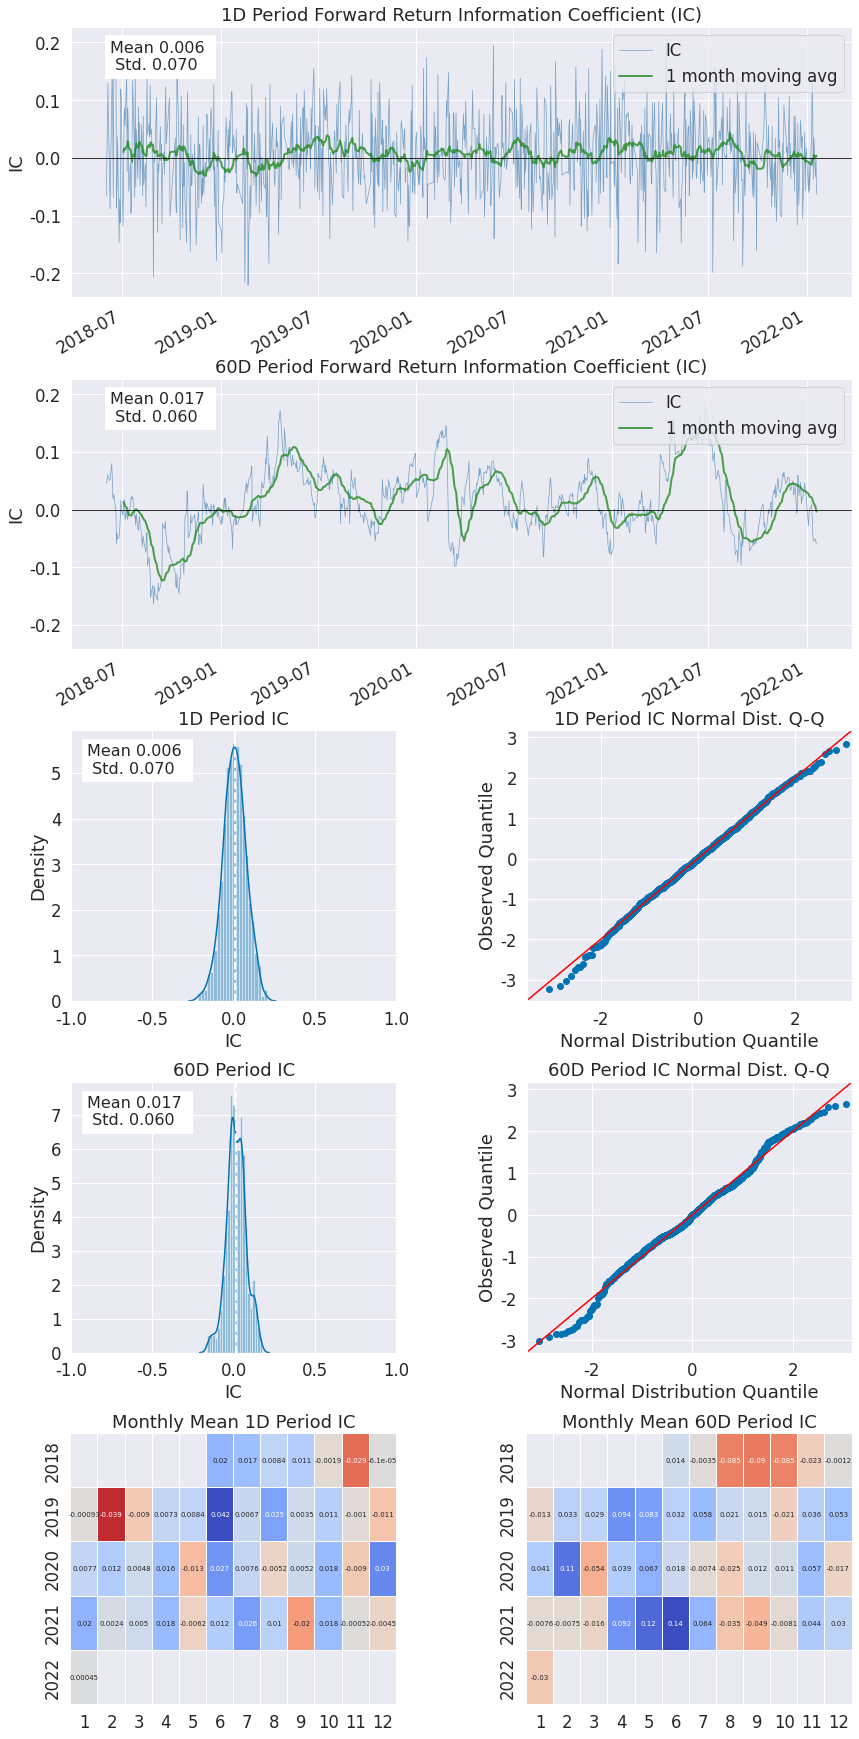

In [123]:
tears.create_information_tear_sheet(factor_data,
                                    group_neutral=True,  # 是否按照行业调整或者行业中性后的收益
                                    by_group=False # 是否按照行业分组展示
                                   )

## 8)因子换手分析

Turnover Analysis


,1D,60D
Quantile 1 Mean Turnover,0.023,0.629
Quantile 2 Mean Turnover,0.040,0.757
Quantile 3 Mean Turnover,0.044,0.785
Quantile 4 Mean Turnover,0.039,0.706
Quantile 5 Mean Turnover,0.026,0.672


,1D,60D
Mean Factor Rank Autocorrelation,0.981,0.238


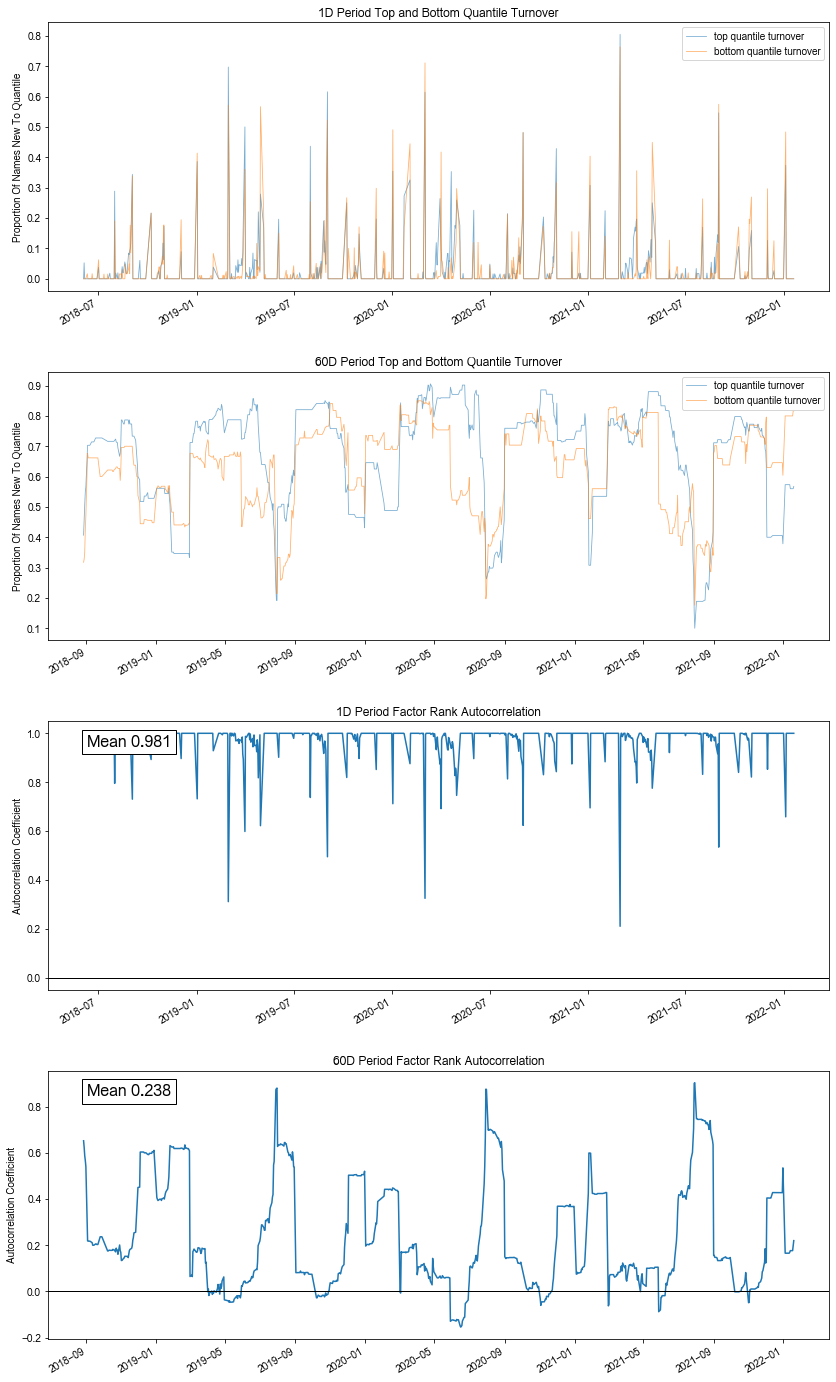

In [125]:
create_turnover_tear_sheet(factor_data)

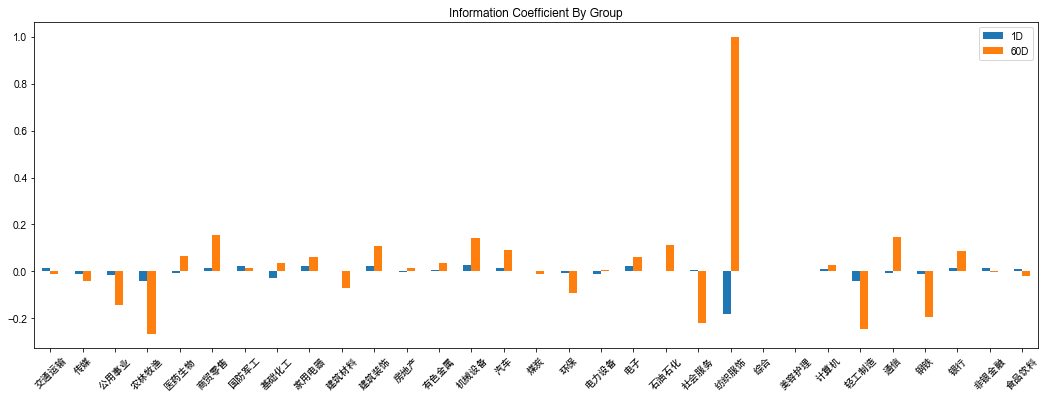

In [128]:
ic_by_sector = perf.mean_information_coefficient(factor_data, by_group=True)
plotting.plot_ic_by_group(ic_by_sector);

# FScore分值描述性分析

<AxesSubplot:title={'center':'FScore值分布情况'}>

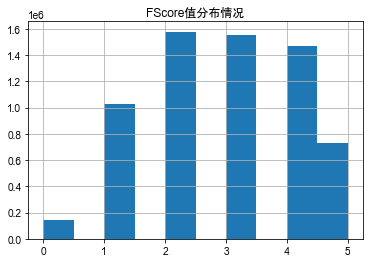

In [8]:
plt.title('FScore值分布情况')
# factor_data['factor'].hist()
df_factor["ffscore"].hist()

In [136]:
df[['roe','delta_roe','delta_lever','delta_caturn','delta_turn']].describe().T

,count,mean,std,min,25%,50%,75%,max
roe,264868.0,0.966693,0.179438,0.0,1.0,1.0,1.0,1.0
delta_roe,264868.0,0.415347,0.492783,0.0,0.0,0.0,1.0,1.0
delta_lever,264868.0,0.374806,0.484074,0.0,0.0,0.0,1.0,1.0
delta_caturn,264868.0,0.520875,0.499565,0.0,0.0,1.0,1.0,1.0
delta_turn,264868.0,0.515865,0.499749,0.0,0.0,1.0,1.0,1.0
